## math_project2
## I. Problem Statement

The purpose of this project is to develop a YOLOV5 license plate detection model that can automatically localize license plates in images with high accuracy and efficiency. License plate detection is important in various applications, including traffic management, parking management, toll collection, law enforcement, and surveillance. Manual detection of license plates is a challenging task due to the large number of vehicles on the road and the variability in license plate design and positioning. Manual detection also requires a significant amount of time and resources, which can be a bottleneck in large-scale applications.

## II. Methodology

Data collection and preprocessing:

https://www.kaggle.com/datasets/andrewmvd/car-plate-detection

The 433 images with bounding box annotations which is collected on kaggle will be used for training and testing the model. We will preprocessing the dataset by Resize the images, Normalize the pixel values and Extract the license plate region.

## Group Members
Jincheng Jiang 
Zhuang Miao 

Clone and install the YOLO from github repo

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15365, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15365 (delta 1), reused 2 (delta 0), pack-reused 15355
Receiving objects: 100% (15365/15365), 14.36 MiB | 28.39 MiB/s, done.
Resolving deltas: 100% (10504/10504), done.
/kaggle/working/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
librosa 0.10.0

In [2]:
!sudo apt-get update

Get:1 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:3 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:6 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [416 kB]
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [969 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2060 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 

In [3]:
!sudo apt-get install python3-venv --yes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.8 libpython3.8-minimal libpython3.8-stdlib python3.8
  python3.8-minimal python3.8-venv
Suggested packages:
  python3.8-doc binfmt-support
The following NEW packages will be installed:
  python3-venv python3.8-venv
The following packages will be upgraded:
  libpython3.8 libpython3.8-minimal libpython3.8-stdlib python3.8
  python3.8-minimal
5 upgraded, 2 newly installed, 0 to remove and 73 not upgraded.
Need to get 6314 kB of archives.
After this operation, 46.1 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpython3.8 amd64 3.8.10-0ubuntu1~20.04.7 [1626 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 python3.8 amd64 3.8.10-0ubuntu1~20.04.7 [387 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpython3.8-stdlib amd64 3.8.10-0ub

Build a virtual environment to run yolov5

In [4]:
!python3 -m venv yolov5-env

In [5]:
!source yolov5-env/bin/activate

In [6]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html
!pip install wandb
!pip install pandas
!pip install matplotlib

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 466.5 kB/s eta 0:00:000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 52.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0
    Uninstalling torchvision-0.14.0:
      Successfully uninstalled torchvision-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.9.4 requires torch>=1.10.0, but you have torch 1.9.0+cu111 which is incompatible.
kornia 0.6.10 requires torch>=1.9.1, but you have torch 1.9.0+cu111 which is incompatible.


In [7]:
!pip install -qr requirements.txt

In [8]:
import yolov5

Import the necessary libraries
Suppress warning messages that may occur during the execution of a Python program

In [9]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The path of plate annotations and car images

In [10]:
a_path = "/kaggle/input/car-plate-detection/annotations"
i_path = "/kaggle/input/car-plate-detection/images"

Set the list for img and plate location storage

In [11]:
X = []
y = []

Build new dataset to store the annotation information

In [12]:
dataset = {
            "filename":[],   
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],   
            "xmax":[],
            "ymax":[],
           }

In [13]:
from lxml import etree

Extracting information from XML files that contain annotations for images, such as image size (width and height) and bounding box coordinates (xmin, ymin, xmax, ymax) for object detection tasks.

In [14]:
# extract the size of image
for annotation in glob.glob(a_path+"/*.xml"): #extract xml files
    ETtree = etree.parse(annotation)
    tree = ET.parse(annotation)
    
    # according to tag in xml file, extract the information of img and plate location
    for dim in ETtree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
        
        
    for dim in ETtree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)
        ymin = int(dim.xpath("ymin")[0].text)
        xmax = int(dim.xpath("xmax")[0].text)
        ymax = int(dim.xpath("ymax")[0].text)
        y.append([int(xmax), int(ymax), int(xmin), int(ymin)]) # put the plate location information in a list
        
    #get the name of the xml file and find the related img (some pictures have multiple plates)
        data_name=[annotation.split('/')[-1][0:-4]] 
        img_name = data_name[0]
        img_name = img_name + ".png"
        img_path = os.path.join(i_path, img_name)
        img_path = img_path.replace("\\", "/")
        img1 = glob.glob(img_path)
        img = cv2.imread(img1[0])
        X.append(np.array(img))
        
        dataset['filename'].append(img_name)
        dataset['width'].append(width)
        dataset['height'].append(height)
        dataset['xmin'].append(xmin)
        dataset['ymin'].append(ymin)
        dataset['xmax'].append(xmax)
        dataset['ymax'].append(ymax)

In [15]:
data_plate=pd.DataFrame(dataset)
data_plate

filename  width  height  xmin  ymin  xmax  ymax
0    Cars339.png    500     300   209   135   283   169
1     Cars13.png    400     268   191   147   242   169
2     Cars74.png    400     267   115   115   277   153
3     Cars16.png    400     221    36   175    62   186
4    Cars291.png    517     303    71   205   215   246
..           ...    ...     ...   ...   ...   ...   ...
466  Cars166.png    300     400   148   123   201   150
467   Cars60.png    400     300    45    98   364   159
468   Cars52.png    400     300   226   181   327   210
469  Cars297.png    400     233   158   149   247   170
470  Cars349.png    400     267    38   225   146   249

[471 rows x 7 columns]

In [16]:
X[2]

array([[[ 29,  72,  67],
        [ 53,  94,  92],
        [ 63, 104, 102],
        ...,
        [117, 104,  84],
        [118, 105,  85],
        [121, 107,  89]],

       [[ 31,  74,  69],
        [ 53,  95,  92],
        [ 63, 103, 102],
        ...,
        [120, 108,  87],
        [120, 107,  87],
        [123, 110,  91]],

       [[ 44,  90,  85],
        [ 56, 100,  96],
        [ 62, 105, 101],
        ...,
        [144, 132, 110],
        [138, 125, 103],
        [141, 128, 107]],

       ...,

       [[228, 227, 225],
        [214, 213, 211],
        [206, 206, 204],
        ...,
        [ 19,  18,  20],
        [ 10,   9,  11],
        [ 13,  12,  14]],

       [[203, 203, 199],
        [192, 191, 188],
        [197, 196, 193],
        ...,
        [ 27,  27,  28],
        [ 19,  17,  19],
        [ 14,  13,  14]],

       [[180, 182, 177],
        [178, 179, 175],
        [189, 188, 184],
        ...,
        [ 30,  30,  31],
        [ 16,  14,  16],
        [ 12,  11,  12]]

In [17]:
y[2]

[277, 153, 115, 115]

Display the image with the bounding box

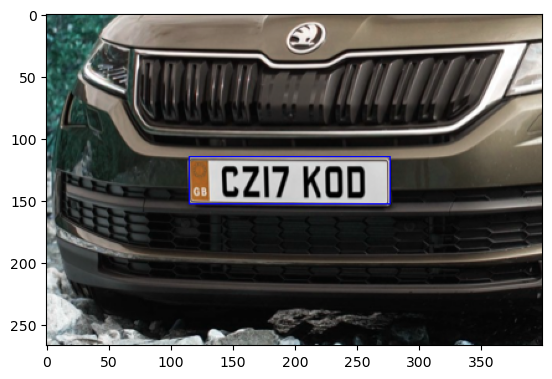

In [18]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [19]:
!mkdir "/kaggle/working/labels"

Processing image annotations in the YOLOv5 format. Normalizes the xmin, ymin, xmax, ymax values to YOLOv5 format by dividing them by the width and height of the image, adds the calculated x_center, y_center, frame_width, and frame_height values as new columns to the data_plate dataframe.

In [21]:
x_center = []
y_center = []
frame_width = []
frame_height = []

save_type = 'w'

for i, row in enumerate(data_plate.iloc):
    # delete the ".png" in filename
    current_filename = str(row.filename[:-4])
    
    # extract the information of image
    width, height, xmin, ymin, xmax, ymax = list(data_plate.iloc[i][-6:])
    
    # normalize the information to YOLOV5 type
    x=(xmin+xmax)/2/width
    y=(ymin+ymax)/2/height
    width=(xmax-xmin)/width
    height=(ymax-ymin)/height
    
    x_center.append(x)
    y_center.append(y)
    frame_width.append(width)
    frame_height.append(height)
    
    # create a string with the YOLOv5 format label
    txt = '0' + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + '\n'
    
    # create separate annotation files for each image
    if i > 0:
        previous_filename = str(data_plate.filename[i-1][:-4])
        save_type='a+' if current_filename == previous_filename else 'w'
    
    with open("/kaggle/working/labels/" + str(row.filename[:-4]) +'.txt', save_type) as f:
        f.write(txt)

        
data_plate['x_center']=x_center
data_plate['y_center']=y_center
data_plate['frame_width']=frame_width
data_plate['frame_height']=frame_height
    

In [22]:
import os

files = os.listdir('/kaggle/working/labels')
print(files[0])

Cars145.txt


In [23]:
len(files)

433

In [24]:
data_plate

filename  width  height  xmin  ymin  xmax  ymax  x_center  y_center  \
0    Cars339.png    500     300   209   135   283   169  0.492000  0.506667   
1     Cars13.png    400     268   191   147   242   169  0.541250  0.589552   
2     Cars74.png    400     267   115   115   277   153  0.490000  0.501873   
3     Cars16.png    400     221    36   175    62   186  0.122500  0.816742   
4    Cars291.png    517     303    71   205   215   246  0.276596  0.744224   
..           ...    ...     ...   ...   ...   ...   ...       ...       ...   
466  Cars166.png    300     400   148   123   201   150  0.581667  0.341250   
467   Cars60.png    400     300    45    98   364   159  0.511250  0.428333   
468   Cars52.png    400     300   226   181   327   210  0.691250  0.651667   
469  Cars297.png    400     233   158   149   247   170  0.506250  0.684549   
470  Cars349.png    400     267    38   225   146   249  0.230000  0.887640   

     frame_width  frame_height  
0       0.148000      0.113333  
1       0.127500      0.082090  
2       0.405000      0.142322  
3       0.065000      0.049774  
4       0.278530      0.135314  
..           ...           ...  
466     0.176667      0.067500  
467     0.797500      0.203333  
468     0.252500      0.096667  
469     0.222500      0.090129  
470     0.270000      0.089888  

[471 rows x 11 columns]

In [25]:
duplicate_filenames = data_plate[data_plate['filename'].duplicated(keep=False)]['filename'].unique()
duplicate_rows = data_plate[data_plate['filename'].isin(duplicate_filenames)]
print(duplicate_rows)

        filename  width  height  xmin  ymin  xmax  ymax  x_center  y_center  \
7    Cars132.png    400     225    23   190    56   198   0.09875  0.862222   
8    Cars132.png    400     225   378   188   400   200   0.97250  0.862222   
48   Cars295.png    400     256    52   170    73   182   0.15625  0.687500   
49   Cars295.png    400     256   237   143   271   162   0.63500  0.595703   
81   Cars358.png    400     200    44    94   107   107   0.18875  0.502500   
..           ...    ...     ...   ...   ...   ...   ...       ...       ...   
406  Cars413.png    400     256    51   170    73   183   0.15500  0.689453   
425  Cars103.png    400     196   230   129   248   134   0.59750  0.670918   
426  Cars103.png    400     196   189   116   202   121   0.48875  0.604592   
448   Cars85.png    400     267    86   218   146   235   0.29000  0.848315   
449   Cars85.png    400     267   313   129   358   141   0.83875  0.505618   

     frame_width  frame_height  
7         0.0825  

In [26]:
# some images have multiple bounding box with separate information
filtered_data = data_plate[data_plate['filename'] == 'Cars295.png']
filtered_data

filename  width  height  xmin  ymin  xmax  ymax  x_center  y_center  \
48  Cars295.png    400     256    52   170    73   182   0.15625  0.687500   
49  Cars295.png    400     256   237   143   271   162   0.63500  0.595703   

    frame_width  frame_height  
48       0.0525      0.046875  
49       0.0850      0.074219

Images with multiple bboxes store consistent yolov5 information in one txt file

In [27]:
with open('/kaggle/working/labels/Cars295.txt', 'r') as file:
    contents = file.read()
    print(contents)

0 0.15625 0.6875 0.0525 0.046875
0 0.635 0.595703125 0.085 0.07421875



In [28]:
# create a list of img names
img_names = [*os.listdir("/kaggle/input/car-plate-detection/images")]

In [29]:
img_names[0:5]

['Cars393.png', 'Cars376.png', 'Cars87.png', 'Cars190.png', 'Cars177.png']

In [30]:
data_plate['filename'] = data_plate['filename'].str.replace('.png', '')

In [31]:
data_plate

filename  width  height  xmin  ymin  xmax  ymax  x_center  y_center  \
0    Cars339    500     300   209   135   283   169  0.492000  0.506667   
1     Cars13    400     268   191   147   242   169  0.541250  0.589552   
2     Cars74    400     267   115   115   277   153  0.490000  0.501873   
3     Cars16    400     221    36   175    62   186  0.122500  0.816742   
4    Cars291    517     303    71   205   215   246  0.276596  0.744224   
..       ...    ...     ...   ...   ...   ...   ...       ...       ...   
466  Cars166    300     400   148   123   201   150  0.581667  0.341250   
467   Cars60    400     300    45    98   364   159  0.511250  0.428333   
468   Cars52    400     300   226   181   327   210  0.691250  0.651667   
469  Cars297    400     233   158   149   247   170  0.506250  0.684549   
470  Cars349    400     267    38   225   146   249  0.230000  0.887640   

     frame_width  frame_height  
0       0.148000      0.113333  
1       0.127500      0.082090  
2       0.405000      0.142322  
3       0.065000      0.049774  
4       0.278530      0.135314  
..           ...           ...  
466     0.176667      0.067500  
467     0.797500      0.203333  
468     0.252500      0.096667  
469     0.222500      0.090129  
470     0.270000      0.089888  

[471 rows x 11 columns]

In [32]:
# split the images into training, validation and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(img_names, test_size=0.2, random_state=42)
test, val = train_test_split(test, test_size=0.7, random_state=42)

In [33]:
# create train, validation and test dir
os.chdir('/kaggle/working/')
os.mkdir('./yolov5/data/train')
os.mkdir('./yolov5/data/val')
os.mkdir('./yolov5/data/test')
os.mkdir('./yolov5/data/train/images')
os.mkdir('./yolov5/data/train/labels')
os.mkdir('./yolov5/data/test/images')
os.mkdir('./yolov5/data/test/labels')
os.mkdir('./yolov5/data/val/images')
os.mkdir('./yolov5/data/val/labels')

The function copyImages takes a list of image filenames (imageList) and a folder name (folder_Name) as input. Uses the PIL library to open each image from the input folder, and then saves the image to a new location in the YOLOv5 format,

In [34]:
# define the images copy function
from PIL import Image

def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open("../input/car-plate-detection/images/"+image)
        img.save("./yolov5/data/"+folder_Name+"/images/"+image)

In [35]:
copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

Check if the images have been splited to target folder

In [36]:
path = "/kaggle/working/yolov5/data/train/images"

files = os.listdir(path)

print(files[0])
print(len(files))

Cars139.png
346


In [37]:
data_string = data_plate.astype('string')

The function writes the generated string to a .txt file with the same name as the image, but with a .txt extension, in the directory "./yolov5/data/"+data_name+"/labels/". This file will contain the labels for the corresponding image in the YOLOv5 format.

In [38]:
def create_labels(image_list, data_name):
    #create a list of image names without .img
    fileNames = [x.split(".")[0] for x in image_list]
    
    # create dataframe where 'filename' column = name
    for name in fileNames:
        data = data_string[data_string.filename==name]
        box_list = []
        
        # add object class and 4 box parameters in box_list
        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(str(0)+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["frame_width"]+" "+row["frame_height"])
        
        # convert the bound box information to a string for YOLOV5 to detect
        text = "\n".join(box_list)
        with open("./yolov5/data/"+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)

In [39]:
create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

Check if the label files have been created

In [40]:
folder_path = './yolov5/data/train/labels'
files = os.listdir(folder_path)

for file in files:
    print(file)
    break

Cars300.txt


In [41]:
with open('/kaggle/working/yolov5/data/train/labels/Cars295.txt', 'r') as file:
    contents = file.read()
    print(contents)

0 0.15625 0.6875 0.0525 0.046875
0 0.635 0.595703125 0.085 0.07421875


In [42]:
# go to YOLO directory
%cd yolov5

/kaggle/working/yolov5


Initializes Notebook display to show images produced by the YOLOv5 model.

In [43]:
from IPython.display import Image, clear_output
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.7.12 torch-1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4557.6/8062.4 GB disk)


In [44]:
# define the train and val directories of yaml text, nc means number of class and names is the class name
yaml_text = """train: data/train/images
val: data/val/images

nc: 1
names: ['license']"""


In [45]:
# write yaml text to data.yaml
with open("data/data.yaml", 'w') as file:
    file.write(yaml_text)

In [46]:
with open("data/data.yaml", 'r') as file:
    print(file.read())

train: data/train/images
val: data/val/images

nc: 1
names: ['license']


The %writetemplate magic command takes a filename as the line argument and a cell as the cell argument. It opens the file in write mode using the filename provided, and writes the contents of the cell to the file using the format() method to replace placeholders with the values of variables from the global namespace using **globals().

In [47]:
#customize iPython writefile to write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

This model has a YOLOv5s backbone with a custom head, designed for one-class object detection tasks. The backbone consists of a series of convolutional layers and bottleneck blocks, which are used to extract features from the input image.

In [48]:
%%writetemplate models/custom_yolov5s.yaml

# parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
    - [10,13, 16,30, 33,23]  
    - [30,61, 62,45, 59,119]  
    - [116,90, 156,198, 373,326] 
    
# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]], 
   [-1, 1, Conv, [128, 3, 2]],  
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  
  ]

# YOLOv5 head
head:
    [[-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 6], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [512, False]],  

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 4], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [256, False]],  

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [512, False]],  

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],  
    [-1, 3, BottleneckCSP, [1024, False]], 

    [[17, 20, 23], 1, Detect, [nc, anchors]],  
    ]

In [49]:
# train yolov5s on data
# record the time of training
# --img: size of image; 
# --data: The path to the data configuration file
# --cfg: The path to the model configuration file
# --name: The name of the results folder
# --cache: Enable caching images for faster training

start = datetime.now()
!python train.py --img 640 --batch 32 --epochs 50 --data data/data.yaml --cfg models/custom_yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache
end = datetime.now()

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=models/custom_yolov5s.yaml, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to 

In [50]:
print("Runtime =",end-start)

Runtime = 0:06:48.681023


In [51]:
# check the train model result list
file_list = os.listdir('runs/train/yolov5s_results')
file_list

['val_batch0_labels.jpg',
 'confusion_matrix.png',
 'results.csv',
 'labels.jpg',
 'opt.yaml',
 'F1_curve.png',
 'train_batch1.jpg',
 'labels_correlogram.jpg',
 'train_batch0.jpg',
 'train_batch2.jpg',
 'events.out.tfevents.1680435340.3596ba3427d1.1223.0',
 'PR_curve.png',
 'hyp.yaml',
 'results.png',
 'weights',
 'val_batch0_pred.jpg',
 'P_curve.png',
 'R_curve.png']

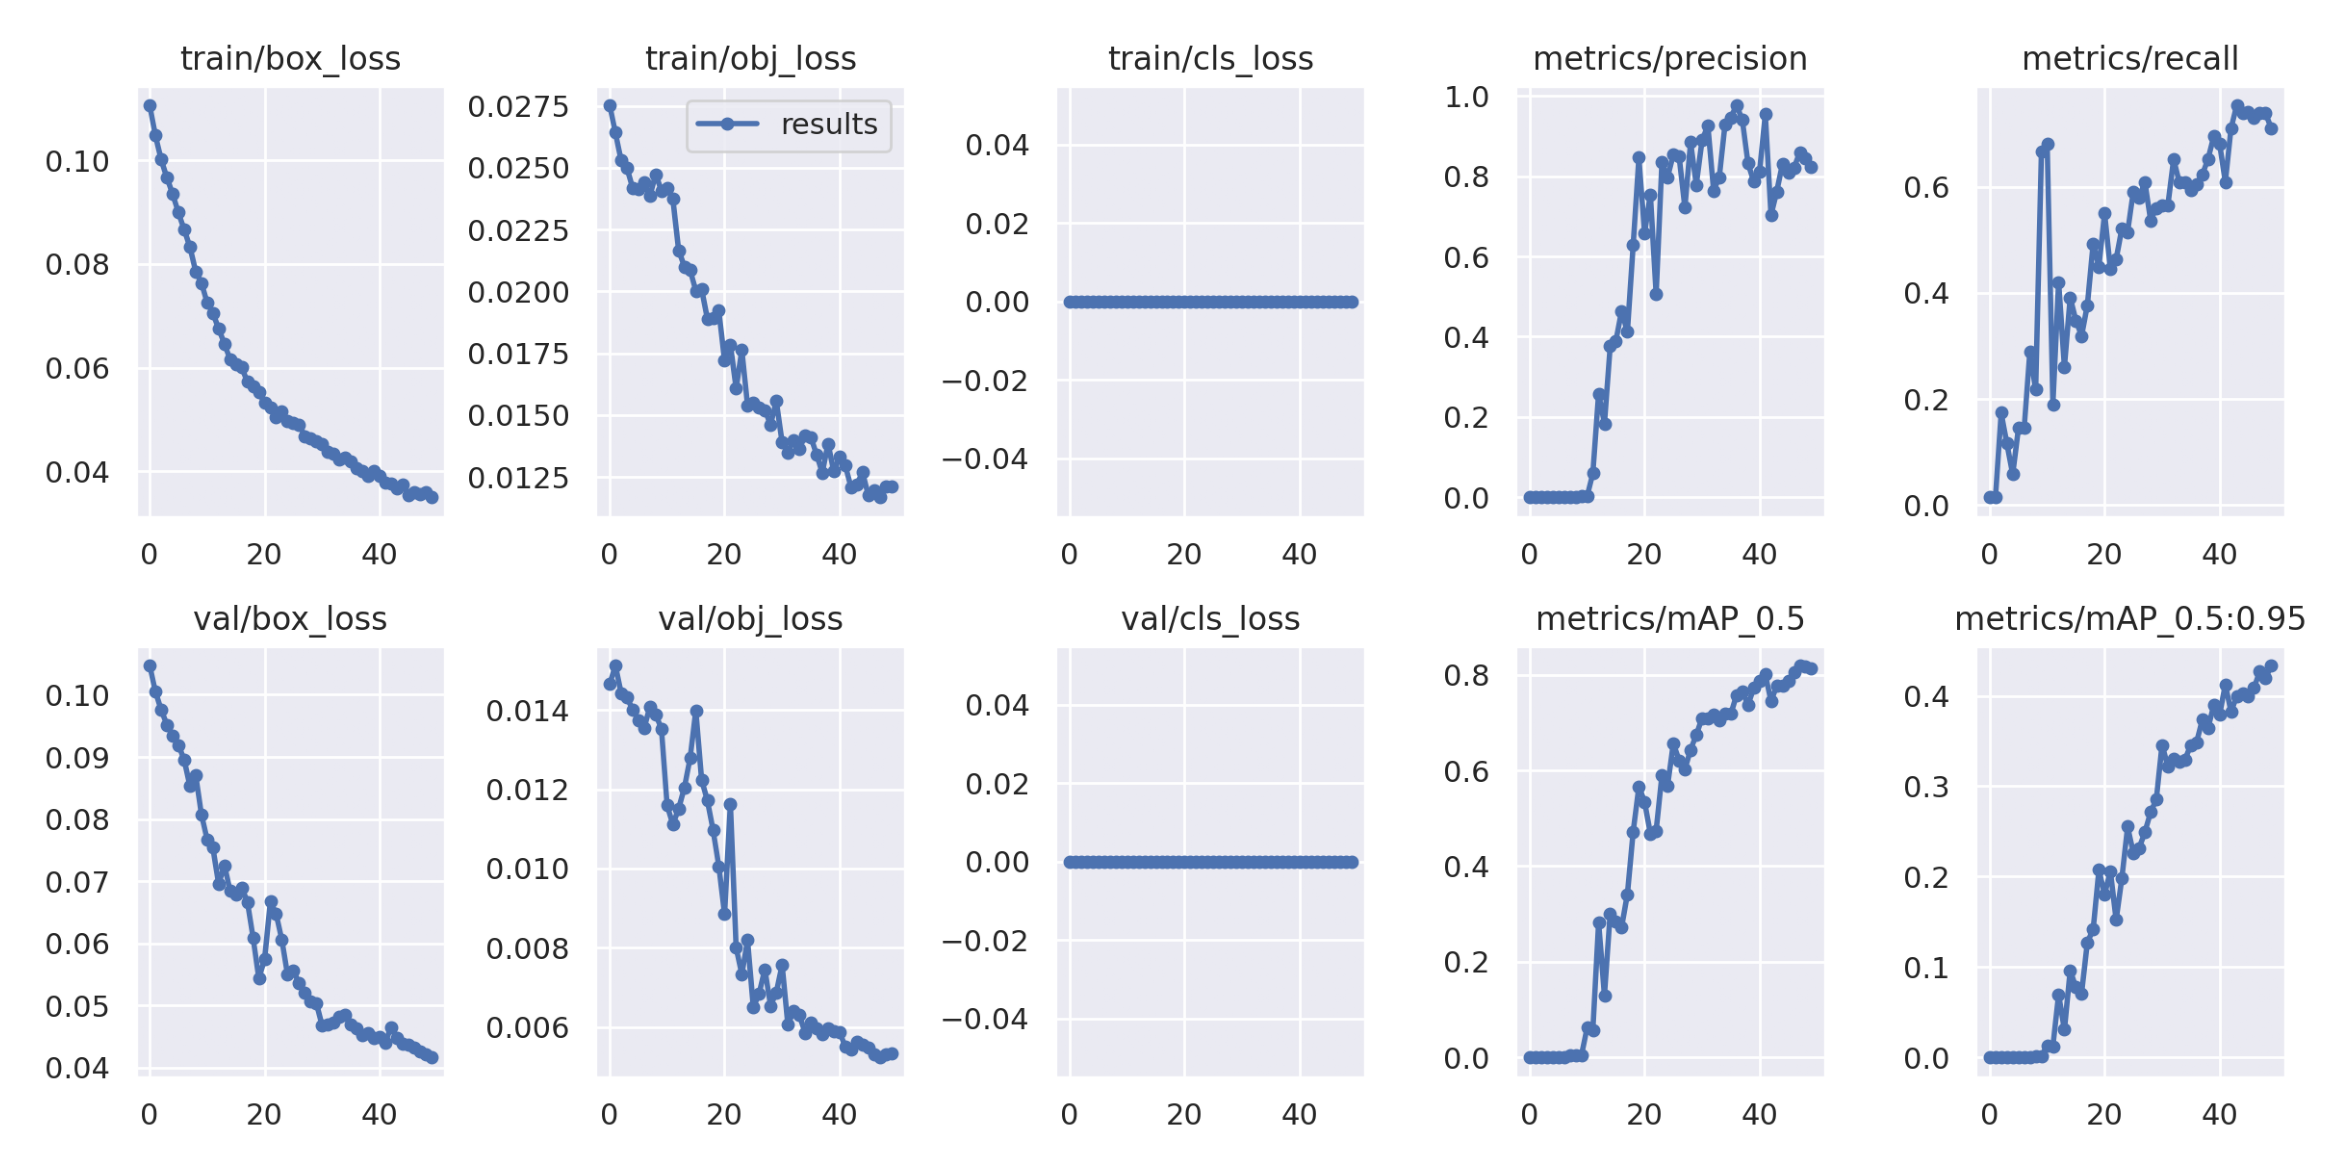

In [52]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/runs/train/yolov5s_results/results.png'))

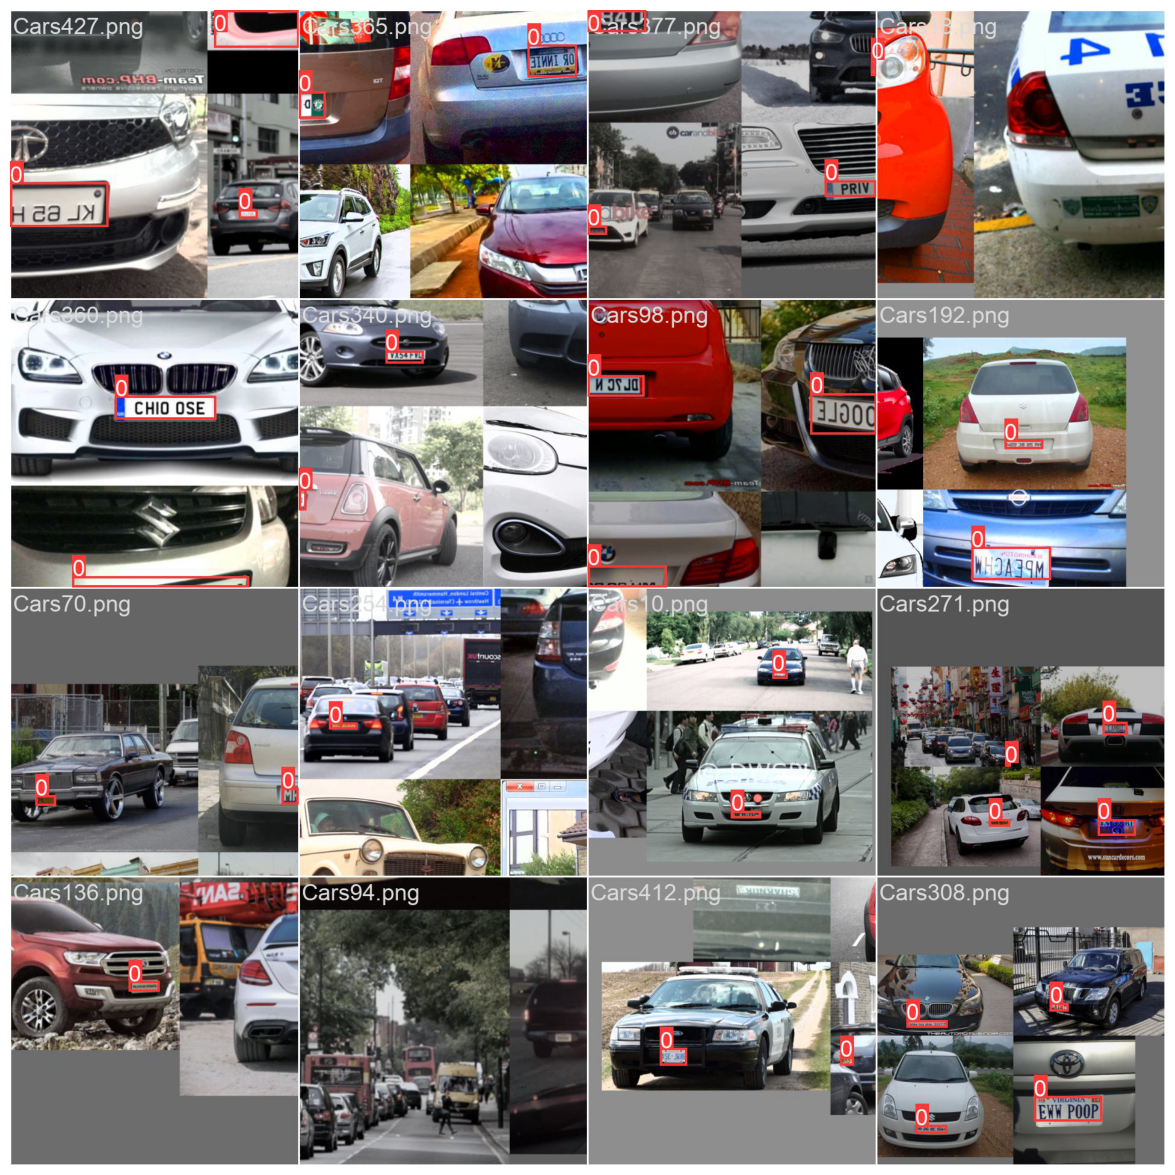

In [53]:
# visualize the train results
img = plt.imread('runs/train/yolov5s_results/train_batch2.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [54]:
# apply YOLOv5 framework on test images
# --conf 0.4: 
!python detect.py --source data/test/images/ --weight runs/train/yolov5s_results/weights/best.pt --name expTestImage --conf 0.4

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=data/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=expTestImage, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.7.12 torch-1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
image 1/26 /kaggle/working/yolov5/data/test/images/Cars100.png: 448x640 1 license,

In [57]:
# show the trained test image example
dir_path = '/kaggle/working/yolov5/runs/detect/expTestImage'
files = os.listdir(dir_path)
files[1]

'Cars246.png'

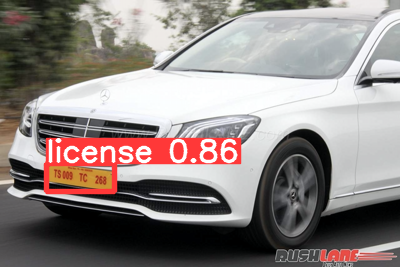

In [58]:
Image("/kaggle/working/yolov5/runs/detect/expTestImage/Cars246.png")

In [59]:
folder_name = 'new_picture'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [61]:
# get some new images to test the YOLOV5 model
import shutil

shutil.copy('/kaggle/input/new-car-picture/new1.png', '/kaggle/working/yolov5/new_picture/new1.png')
shutil.copy('/kaggle/input/new-car-picture/new2.png', '/kaggle/working/yolov5/new_picture/new2.png')

'/kaggle/working/yolov5/new_picture/new2.png'

In [62]:
dir_path = '/kaggle/working/yolov5/new_picture'
files = os.listdir(dir_path)
files

['new1.png', 'new2.png']

In [63]:
!python detect.py --source "/kaggle/working/yolov5/new_picture" --weights '/kaggle/working/yolov5/runs/train/yolov5s_results/weights/best.pt'

detect: weights=['/kaggle/working/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/kaggle/working/yolov5/new_picture, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.7.12 torch-1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
image 1/2 /kaggle/working/yolov5/new_picture/new1.

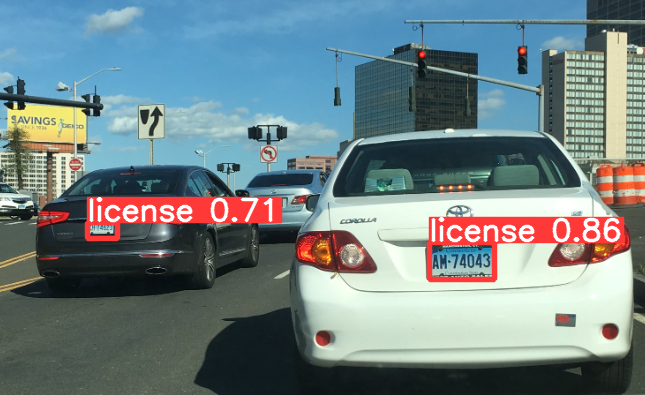

In [65]:
#show the results
Image("/kaggle/working/yolov5/runs/detect/exp/new2.png")

In [ ]:
# https://www.kaggle.com/code/gowrishankarp/license-plate-detection-yolov5-pytesseract
# https://www.kaggle.com/code/saworz/realtime-plate-reading-video-yolov5-easyocr
# https://www.kaggle.com/code/rohitgadhwar/face-mask-detection-yolov5

## Conclusion
The advantages of YOLOv5 include its speed, simplicity, and end-to-end training. It can be a good choice for real-time object detection tasks, such as autonomous driving or video surveillance. However, its performance may not be as good as more complex two-stage detectors on some datasets with small or heavily occluded objects.

On the other hand, a typical CNN model may be more suitable for image classification tasks where the goal is to predict the correct label for an entire image, rather than detecting and localizing specific objects within the image. Therefore, choose the yolo5 model for the car license task is more suitable than a typical CNN model.
